In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from utils.utils import generate_synthetic_data, generate_final_features, split_dataset, convet2dataframe
# ARIMA model with library Darts 
from darts import TimeSeries
from darts.models import AutoARIMA
from darts.metrics import mape
from darts.metrics import mase
from darts.metrics import r2_score
from darts.metrics import rmse
from darts.metrics import mse
from darts.metrics import mae
import warnings 
warnings.filterwarnings("ignore")


## Case 1

In [2]:
# load the data
total_regular_cycle_data = pd.read_csv('dataset/total_regular_cycle_data.csv')
features_total_regular_cycle_data, labels_total_regular_cycle_data = generate_final_features(total_regular_cycle_data)
input_train_total_regular_cycle, input_test_total_regular_cycle, output_train_total_regular_cycle, output_test_total_regular_cycle = split_dataset(features_total_regular_cycle_data, labels_total_regular_cycle_data, reshape=False)

input_train_total_regular_cycle_df = convet2dataframe(input_train_total_regular_cycle, ['period', 'cycle'])
output_train_total_regular_cycle = convet2dataframe(output_train_total_regular_cycle, ['period', 'cycle'])
input_test_total_regular_cycle_df = convet2dataframe(input_test_total_regular_cycle, ['period', 'cycle'])
series_test = TimeSeries.from_dataframe(input_test_total_regular_cycle_df, 'time', ['period'])
output_train_series = TimeSeries.from_dataframe(output_train_total_regular_cycle, 'time', ['period'])
series = TimeSeries.from_dataframe(input_train_total_regular_cycle_df, time_col='time', value_cols=['period'])

# series for cycle prediction
series_cycle = TimeSeries.from_dataframe(input_train_total_regular_cycle_df, time_col='time', value_cols=['cycle'])
series_cycle_test = TimeSeries.from_dataframe(input_test_total_regular_cycle_df, time_col='time', value_cols=['cycle'])

# train the model
model = AutoARIMA()
model.fit(series)

# make prediction
prediction = model.predict(3)
#-----------------------------------#
# model arima for cycle 
model_cycle = AutoARIMA()
model_cycle.fit(series_cycle)
# prediction the cycle 
prediction_cycle = model_cycle.predict(3)
prediction_cycle

<TimeSeries (DataArray) (time: 3, component: 1, sample: 1)>
array([[[0.]],

       [[0.]],

       [[0.]]])
Coordinates:
  * time       (time) int64 48 49 50
  * component  (component) object 'cycle'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [3]:
# reset matplotlib to the default style 
plt.rcParams.update(plt.rcParamsDefault)

In [45]:
months_numbers = np.arange(1,16)

# convet months_numbers to months names 
months_names = np.array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct','nov', 'dec', 'jan', 'feb', 'mar'])


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

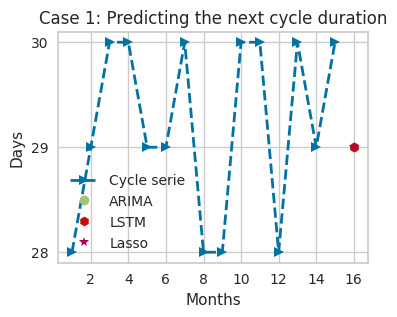

In [49]:
# plot baseline and predictions

plt.figure(figsize=(4, 3))
plt.plot(np.arange(1,16),series_test.values()[-16:], '-->', linewidth=2.0)
plt.plot(np.arange(16, 17),prediction.values()[0].astype(int), 'o')
plt.plot(np.arange(16, 17),prediction.values()[0].astype(int), 'h')
plt.plot(np.arange(16, 17),prediction.values()[0].astype(int), '*')
# round the number in axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylabel('Days')
plt.xlabel('Months')
plt.legend(['Cycle serie', 'ARIMA', 'LSTM', 'Lasso'], loc='lower left')
plt.title('Case 1: Predicting the next cycle duration')
plt.grid(True)

# save the figure
fig = plt.gcf()
fig.savefig('case1_prediction_lstm.eps', dpi=300, bbox_inches='tight')


## Case 2

In [5]:
regular_cycle_data = pd.read_csv('dataset/regular_cycle_data.csv')
features_regular_cycle_data, labels_regular_cycle_data = generate_final_features(regular_cycle_data)
input_train_regular_cycle, input_test_regular_cycle, output_train_regular_cycle, output_test_regular_cycle = split_dataset(features_regular_cycle_data, labels_regular_cycle_data, reshape=False)

#convert2dataframe
input_train_regular_cycle = convet2dataframe(input_train_regular_cycle,  ['period', 'cycle'])
input_test_regular_cycle = convet2dataframe(input_test_regular_cycle,  ['period', 'cycle'])
output_train_regular_cycle = convet2dataframe(output_train_regular_cycle,  ['period', 'cycle'])

#series
series_train_regular_cycle = TimeSeries.from_dataframe(input_train_regular_cycle, time_col='time', value_cols=['period'])
series_test_regular_cycle = TimeSeries.from_dataframe(input_test_regular_cycle, time_col='time', value_cols=['period'])

#series
seriescycle_train_regular_cycle = TimeSeries.from_dataframe(input_train_regular_cycle, time_col='time', value_cols=['cycle'])
seriescycle_test_regular_cycle = TimeSeries.from_dataframe(input_test_regular_cycle, time_col='time', value_cols=['cycle'])

# modelo ARIMA

model_regular_cycle = AutoARIMA()
model_regular_cycle.fit(series_train_regular_cycle)

modelcycle_regular_cycle = AutoARIMA()
modelcycle_regular_cycle.fit(seriescycle_train_regular_cycle)

# predict

prediction_regular_cycle = model_regular_cycle.predict(len(series_test_regular_cycle))

predictioncycle_regular_cycle = modelcycle_regular_cycle.predict(len(seriescycle_test_regular_cycle))



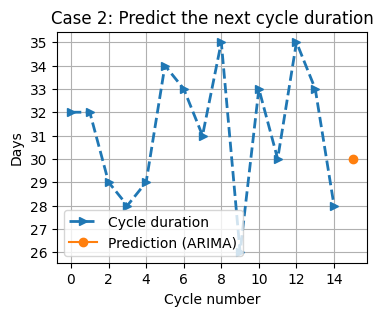

In [6]:
# plot baseline and predictions

plt.figure(figsize=(4, 3))
plt.plot(series_test_regular_cycle.values()[-16:], '-->', linewidth=2.0)
plt.plot(np.arange(15, 16),prediction_regular_cycle.values()[0].astype(int), '-o')
# round the number in axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylabel('Days')
plt.xlabel('Cycle number')
plt.legend(['Cycle duration', 'Prediction (ARIMA)'], loc='lower left')
plt.title('Case 2: Predict the next cycle duration')
plt.grid(True)
plt.show()

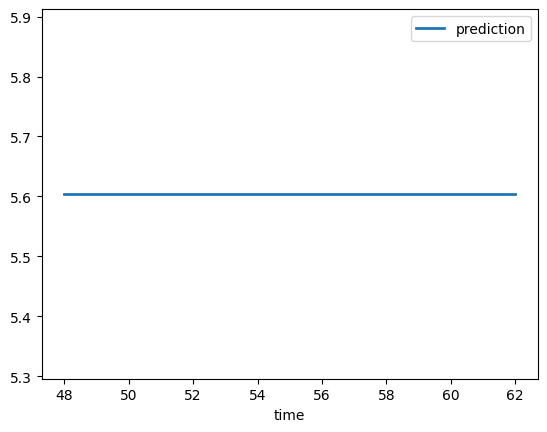

In [7]:
predictioncycle_regular_cycle.plot(label='prediction')

## Case 3

In [8]:
irregular_cycle_data = pd.read_csv('dataset/irregular_cycle_data.csv')
features_irregular_cycle_data, labels_irregular_cycle_data = generate_final_features(irregular_cycle_data)
input_train_irregular_cycle, input_test_irregular_cycle, output_train_irregular_cycle, output_test_irregular_cycle = split_dataset(features_irregular_cycle_data, labels_irregular_cycle_data, reshape=False)

#convert2dataframe
input_train_irregular_cycle = convet2dataframe(input_train_irregular_cycle,  ['period', 'cycle'])

input_test_irregular_cycle = convet2dataframe(input_test_irregular_cycle,  ['period', 'cycle'])

output_train_irregular_cycle = convet2dataframe(output_train_irregular_cycle,  ['period', 'cycle'])

#series

series_train_irregular_cycle = TimeSeries.from_dataframe(input_train_irregular_cycle, time_col='time', value_cols=['period'])

series_test_irregular_cycle = TimeSeries.from_dataframe(input_test_irregular_cycle, time_col='time', value_cols=['period'])

#series cycle 

seriescycle_train_irregular_cycle = TimeSeries.from_dataframe(input_train_irregular_cycle, time_col='time', value_cols=['cycle'])

seriescycle_test_irregular_cycle = TimeSeries.from_dataframe(input_test_irregular_cycle, time_col='time', value_cols=['cycle'])

# modelo ARIMA

model_irregular_cycle = AutoARIMA()

model_irregular_cycle.fit(series_train_irregular_cycle)

# model cycle

modelcycle_irregular_cycle = AutoARIMA()

modelcycle_irregular_cycle.fit(seriescycle_train_irregular_cycle)


# predict

prediction_irregular_cycle = model_irregular_cycle.predict(3)

# predict cycle

predictioncycle_irregular_cycle = modelcycle_irregular_cycle.predict(len(seriescycle_test_irregular_cycle))

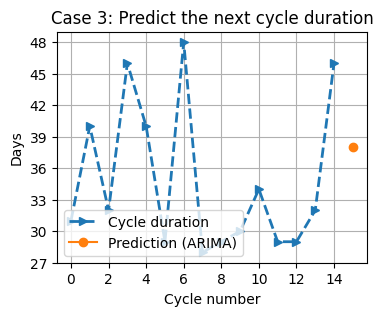

In [9]:
# plot baseline and predictions

plt.figure(figsize=(4, 3))
plt.plot(series_test_irregular_cycle.values()[-16:], '-->', linewidth=2.0)
plt.plot(np.arange(15, 16),prediction_irregular_cycle.values()[0].astype(int), '-o')
# round the number in axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylabel('Days')
plt.xlabel('Cycle number')
plt.legend(['Cycle duration', 'Prediction (ARIMA)'], loc='lower left')
plt.title('Case 3: Predict the next cycle duration')
plt.grid(True)
plt.show()

## Case 1

In [15]:
# using Pycaret for cycle prediction regression 

from pycaret.regression import *


#cycle prediction 
cycle_prediction = setup(data = input_train_total_regular_cycle_df, target = 'period', normalize=True, verbose=True)
#print information grid of models 

best=compare_models()

In [16]:
results = pull()
print(results)

                                    Model     MAE     MSE    RMSE      R2  \
lasso                    Lasso Regression  0.7580  0.7649  0.8641 -0.9561   
llar         Lasso Least Angle Regression  0.7580  0.7649  0.8641 -0.9561   
en                            Elastic Net  0.7580  0.7649  0.8641 -0.9561   
dummy                     Dummy Regressor  0.7580  0.7649  0.8641 -0.9561   
lightgbm  Light Gradient Boosting Machine  0.7580  0.7649  0.8641 -0.9561   
br                         Bayesian Ridge  0.7583  0.7654  0.8644 -0.9576   
ridge                    Ridge Regression  0.7882  0.8076  0.8885 -1.1117   
lr                      Linear Regression  0.7892  0.8092  0.8894 -1.1174   
lar                Least Angle Regression  0.7892  0.8092  0.8894 -1.1174   
omp           Orthogonal Matching Pursuit  0.7892  0.8092  0.8894 -1.1174   
huber                     Huber Regressor  0.7943  0.8174  0.8935 -1.1544   
knn                 K Neighbors Regressor  0.8367  0.9320  0.9374 -1.2393   

In [17]:
# predicition with best model

best_model = create_model('lasso')

# predict unseen data

unseen_predictions = predict_model(best_model, data=input_test_total_regular_cycle_df)
print(unseen_predictions)



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,0.7616,0.7612,0.8725,-0.0980,0.0287,0.0260


    cycle  time  period  prediction_label
0       5     0      28         28.939394
1       5     1      29         28.939394
2       5     2      30         28.939394
3       5     3      30         28.939394
4       5     4      29         28.939394
5       5     5      29         28.939394
6       5     6      30         28.939394
7       5     7      28         28.939394
8       5     8      28         28.939394
9       5     9      30         28.939394
10      5    10      30         28.939394
11      5    11      28         28.939394
12      5    12      30         28.939394
13      5    13      29         28.939394
14      5    14      30         28.939394


## Case 2

In [30]:
# input_train_regular_cycle

models_input_train_regular_cycle = setup(data = input_train_regular_cycle, target = 'period', normalize=True, verbose=True)


best=compare_models()

results = pull()
print(results)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:13:24
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


                                    Model     MAE      MSE    RMSE       R2  \
huber                     Huber Regressor  1.7712   5.0785  1.9973  -3.8467   
knn                 K Neighbors Regressor  1.8600   5.5167  2.0995  -3.9833   
ridge                    Ridge Regression  1.8115   5.1098  2.0305  -4.1405   
lr                      Linear Regression  1.8119   5.1223  2.0275  -4.1604   
lar                Least Angle Regression  1.8119   5.1223  2.0275  -4.1604   
br                         Bayesian Ridge  1.9036   5.2605  2.0980  -4.2281   
en                            Elastic Net  2.1392   5.9010  2.2964  -5.1414   
dummy                     Dummy Regressor  2.1865   5.9786  2.3316  -5.1580   
lightgbm  Light Gradient Boosting Machine  2.1865   5.9786  2.3316  -5.1580   
llar         Lasso Least Angle Regression  2.1887   5.9879  2.3337  -5.1810   
lasso                    Lasso Regression  2.1887   5.9879  2.3337  -5.1810   
omp           Orthogonal Matching Pursuit  2.1008   

In [31]:
# predicition with best model

best_model = create_model('huber')

# predict unseen data

unseen_predictions = predict_model(best_model, data=input_test_regular_cycle)
print(unseen_predictions)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,2.0276,6.4640,2.5424,0.0887,0.0807,0.0663


    cycle  time  period  prediction_label
0       5     0      32         30.345069
1       6     1      32         32.382839
2       5     2      29         30.237740
3       5     3      28         30.184076
4       5     4      29         30.130411
5       6     5      34         32.168181
6       6     6      33         32.114517
7       6     7      31         32.060852
8       6     8      35         32.007188
9       6     9      26         31.953523
10      6    10      33         31.899859
11      6    11      30         31.846194
12      5    12      35         29.701095
13      6    13      33         31.738865
14      5    14      28         29.593766


In [63]:
# input_train_regular_cycle

cycle_models_input_train_regular_cycle = setup(data = input_train_regular_cycle, target = 'cycle', normalize=True, verbose=True)


best=compare_models()

results = pull()
print(results)

                                    Model     MAE     MSE    RMSE      R2  \
gbr           Gradient Boosting Regressor  0.2809  0.1632  0.3688  0.1015   
et                  Extra Trees Regressor  0.2721  0.1605  0.3595  0.0533   
xgboost         Extreme Gradient Boosting  0.2995  0.1738  0.3717  0.0039   
dt                Decision Tree Regressor  0.2083  0.2083  0.3178  0.0000   
catboost               CatBoost Regressor  0.3173  0.1812  0.3890 -0.0294   
rf                Random Forest Regressor  0.3537  0.1824  0.3989 -0.0330   
en                            Elastic Net  0.5176  0.2690  0.5180 -0.1726   
lasso                    Lasso Regression  0.5176  0.2690  0.5180 -0.1726   
dummy                     Dummy Regressor  0.5176  0.2690  0.5180 -0.1726   
lightgbm  Light Gradient Boosting Machine  0.5176  0.2690  0.5180 -0.1726   
llar         Lasso Least Angle Regression  0.5176  0.2690  0.5180 -0.1726   
br                         Bayesian Ridge  0.5259  0.2781  0.5264 -0.2135   

In [64]:
# prediction 

best_model = create_model('huber')

# predict unseen data

unseen_predictions = predict_model(best_model, data=input_test_regular_cycle)
print(unseen_predictions)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,0.4764,0.2372,0.4871,0.0115,0.0744,0.0850


    period  time  cycle  prediction_label
0       32     0      5          5.458830
1       32     1      6          5.462572
2       29     2      5          5.362319
3       28     3      5          5.331397
4       29     4      5          5.369805
5       34     5      6          5.546873
6       33     6      6          5.515951
7       31     7      6          5.450363
8       35     8      6          5.592767
9       26     9      6          5.284523
10      33    10      6          5.530922
11      30    11      6          5.430669
12      35    12      5          5.607737
13      33    13      6          5.542150
14      28    14      5          5.372567


## Case 3

In [59]:
# input_train_irregular_cycle

models_input_train_irregular_cycle = setup(data = input_train_irregular_cycle, target = 'period', normalize=True, verbose=True)

best=compare_models()

results = pull()
print(results)

                                    Model     MAE      MSE    RMSE      R2  \
omp           Orthogonal Matching Pursuit  5.3373  41.1000  6.1243 -0.5086   
en                            Elastic Net  5.3686  41.1295  6.1588 -0.5580   
huber                     Huber Regressor  5.5458  43.5776  6.2851 -0.5765   
ridge                    Ridge Regression  5.4826  42.5662  6.2523 -0.5796   
lr                      Linear Regression  5.4914  42.7152  6.2604 -0.5819   
lar                Least Angle Regression  5.4914  42.7152  6.2604 -0.5819   
lasso                    Lasso Regression  5.4554  42.2978  6.2402 -0.5967   
llar         Lasso Least Angle Regression  5.4554  42.2978  6.2402 -0.5967   
dummy                     Dummy Regressor  5.4702  41.5427  6.2063 -0.6494   
lightgbm  Light Gradient Boosting Machine  5.4702  41.5427  6.2063 -0.6494   
br                         Bayesian Ridge  5.5910  44.0523  6.3834 -0.7004   
knn                 K Neighbors Regressor  5.6383  45.9650  6.51

In [60]:
# predicition with best model 

best_model = create_model('omp')

# predict unseen data

unseen_predictions = predict_model(best_model, data=input_test_irregular_cycle)
print(unseen_predictions)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,6.9345,53.6718,7.3261,-0.1280,0.2001,0.2058


    cycle  time  period  prediction_label
0       7     0      31         36.200105
1       4     1      40         36.322902
2       5     2      32         36.445700
3       7     3      46         36.568497
4       5     4      40         36.691294
5       7     5      29         36.814092
6       5     6      48         36.936889
7       5     7      28         37.059687
8       5     8      29         37.182484
9       4     9      30         37.305282
10      8    10      34         37.428079
11      4    11      29         37.550877
12      5    12      29         37.673674
13      5    13      32         37.796472
14      7    14      46         37.919269


In [65]:
cycle_models_input_train_irregular_cycle = setup(data = input_train_irregular_cycle, target = 'cycle', normalize=True, verbose=True)

best=compare_models()

results = pull()

print(results)


                                    Model     MAE     MSE    RMSE      R2  \
omp           Orthogonal Matching Pursuit  1.1471  1.8988  1.3186 -3.3650   
ridge                    Ridge Regression  1.1402  1.9016  1.3164 -3.3837   
lr                      Linear Regression  1.1389  1.9050  1.3170 -3.3867   
lar                Least Angle Regression  1.1389  1.9050  1.3170 -3.3867   
en                            Elastic Net  1.1686  1.8480  1.3124 -3.4047   
lasso                    Lasso Regression  1.1686  1.8480  1.3124 -3.4047   
dummy                     Dummy Regressor  1.1686  1.8480  1.3124 -3.4047   
lightgbm  Light Gradient Boosting Machine  1.1686  1.8480  1.3124 -3.4047   
llar         Lasso Least Angle Regression  1.1686  1.8480  1.3124 -3.4047   
br                         Bayesian Ridge  1.1772  1.8714  1.3191 -3.4126   
huber                     Huber Regressor  1.1171  2.0717  1.3507 -3.6455   
knn                 K Neighbors Regressor  1.2533  2.2940  1.4383 -4.7613   

In [66]:
# prediction

best_model = create_model('omp')

# predict unseen data

unseen_predictions = predict_model(best_model, data=input_test_irregular_cycle)
print(unseen_predictions)

    period  time  cycle  prediction_label
0       31     0      7          5.194406
1       40     1      4          5.209885
2       32     2      5          5.225364
3       46     3      7          5.240844
4       40     4      5          5.256323
5       29     5      7          5.271802
6       48     6      5          5.287281
7       28     7      5          5.302761
8       29     8      5          5.318240
9       30     9      4          5.333719
10      34    10      8          5.349198
11      29    11      4          5.364677
12      29    12      5          5.380157
13      32    13      5          5.395636
14      46    14      7          5.411115
